----------------------------------------------------
Weights (Newtons): 
4: 8.4672
3: 0.392
2: 0.49000000000000005
1: 0.49000000000000005
TotalWeight: 16.6992
Torque 1 max: 
(N.m): 0.04116000000000031
(N.cm): 4.116000000000031
(kgf.m): 0.004200000000000031
(kgf.cm): 0.4200000000000031
Torque 2 max: 
(N.m): 0.13582413027456788
(N.cm): 13.582413027456788
(kgf.m): 0.013859605130057946
(kgf.cm): 1.3859605130057946


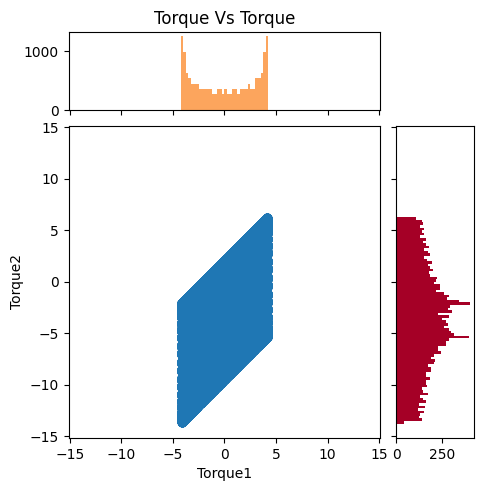

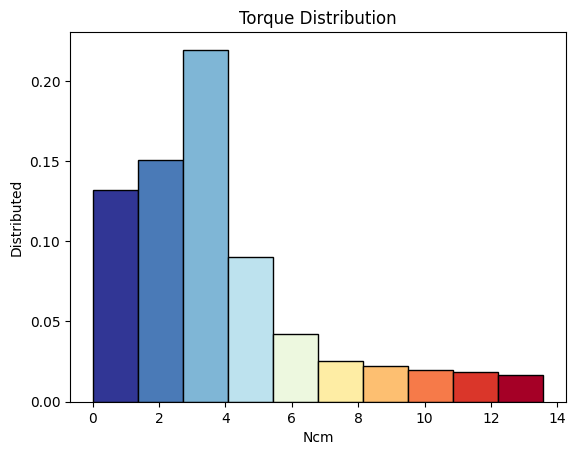

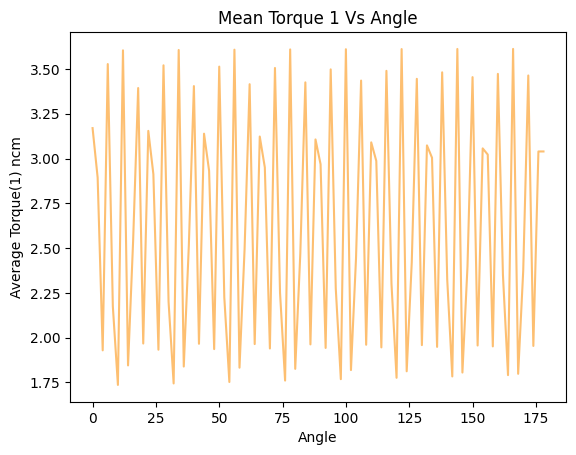

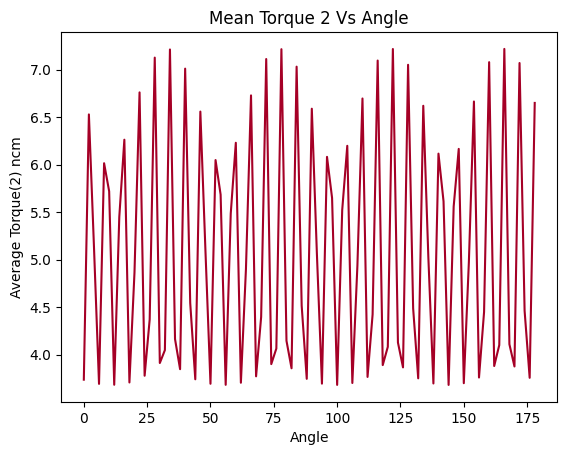

In [9]:
# Auto torque deriveration. 

# calculations derived from https://community.robotshop.com/tutorials/show/robot-leg-torque-tutorial
# matplotlib stuff derived from their wiki page.
# program copyright Dylan Holmes, 2023, all rights reserved

from math import cos
import matplotlib as mp
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np

theta_1_start = 0
theta_1_end = 180
theta_2_start = 0
theta_2_end = 90

# grams
m4 = 764 + 100
m3 = 40
m2 = 50
m1 = 50

# m
L1 = 0.010
L2 = 0.014
L3 = 0.021

W4 = 9.8 * m4/1000
W3 = 9.8 * m3/1000
W2 = 9.8 * m2/1000
W1 = 9.8 * m1/1000

print("----------------------------------------------------")
print("Weights (Newtons): ")
print("4: " + str(W4))
print("3: " + str(W3))
print("2: " + str(W2))
print("1: " + str(W1))
print("TotalWeight: " + str(W4 + 6*(W1+W2+W3)))

# N1 + 2*N2
CombinedThreeLegNormal = W4 + 6*(W1+W2+W3)


MaxT1 = 0
tt1 = []
th1 = []
MaxT2 = 0
tt2 = []
th2 = []

theta_1_count = 0
theta_2_count = 0
for theta_1 in range(theta_1_start, theta_1_end):
    theta_1_count +=1
    for theta_2 in range(theta_2_start, theta_2_end):
        if (theta_1_count ==1 ): theta_2_count +=1 
        
        # Torque Left Foot = 0
        # = sum of torques on the left foot
        
        Tlf1 = W1 * L1 * cos(theta_1)
        Tlf2 = W2 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf3 = W3 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf4 = W4 * (L1 * cos(theta_1) + L2 * cos(theta_2) + L3)
        
        Tlf5 = 2 * W3 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf6 = 2 * W2 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf7 = 2 * W1 * (L1 * cos(theta_1) + 2 * L2 * cos(theta_2) + 2 * L3)
        
        # This * 2 * N2 = Tlf8
        Tlf_p8 = 2*L1*cos(theta_1) + 2 *L2 * cos(theta_2) + 2 * L3
        
        # As, 
        # N1 + 2N2 = CombinedThreeLegNormal
        # And NetTorque = 0
        
        N2 = ((Tlf1 + Tlf2 + Tlf3 + Tlf4 + Tlf5 + Tlf6 + Tlf7)/Tlf_p8)/2
        N1 = CombinedThreeLegNormal - 2*N2
        
        #print("----------------------------------------------------")
        #print("Normal2 (Shared normal of two leg side): " + str(N2))
        #print("Normal1 (Normal of one leg side): " + str(N1))
        #print("----------------------------------------------------")
        
        # Torque on the knee = 0
        # = Sum of torques around the knee
        
        Tk1 = N1 * (L1 * cos(theta_1))
              # two in one here          |    ----------------
        Tk2 = W2 * ( L2 * cos(theta_2)) + W3 * (L2 * cos(theta_2))
              # two in one here               |    ----------------
        Tk3 = W4 * (L2 * cos(theta_2) + L3 ) + 2 * W3 * (L2 * cos(theta_2) + 2 * L3)
        Tk4 = 2 * W2 * (L2 * cos(theta_2) + 2 * L3)
        Tk5 = 2 * W1 * (2 * L2 * cos(theta_2) + 2 * L3)
        Tk6 = -2 * N2 * (2 * L2 * cos(theta_2) + 2 * L3 + L1 * cos(theta_1))
        
        T1 = Tk1 + Tk2 + Tk3 + Tk4 + Tk5 + Tk6
        
        #print("Torque 1 (Nm) : " + str(T1))
        #print("Torque 1 (Ncm) : " + str(T1 * 100))
        
        # Torque on Hip = 0
        # = sum of torques around the hip
        
        Th1 = N1 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Th2 = -W1 * (L2 * cos(theta_2))
        Th3 = W4 * L3
        Th4 = 2 * W2 * L3
        Th5 = 2 * W3 * L3
        Th6 = 2 * W1 * (2 * L3 + L2 * cos(theta_2))
        Th7 = -2 * N2 * (2 * L3 + L2 * cos(theta_2) + L1 * cos(theta_1))
        
        T2 = Th1 + Th2 + Th3 + Th4 + Th5 + Th6 + Th7
        
        tt1.append(T1*100)
        tt2.append(T2*100)
        th1.append(theta_1)
        th2.append(theta_2)
        
        if (abs(T2) > MaxT2):
            MaxT2 = abs(T2)
        if (abs(T1) > MaxT1):
            MaxT1 = abs(T1)
        #print("Torque 2 (Nm) : " + str(T2))
        #print("Torque 2 (Ncm) : " + str(T2 * 100))

print ("Torque 1 max: ")
print ("(N.m): " + str(MaxT1))
print ("(N.cm): " + str(MaxT1 * 100))
print ("(kgf.m): " + str(MaxT1 / 9.8))
print ("(kgf.cm): " + str(MaxT1 / 9.8  * 100 ))

print ("Torque 2 max: ")
print ("(N.m): " + str(MaxT2))
print ("(N.cm): " + str(MaxT2 * 100))
print ("(kgf.m): " + str(MaxT2 / 9.8))
print ("(kgf.cm): " + str(MaxT2 / 9.8  * 100 ))


#
# MATPLOTLIB
#

cm = mp.colormaps['RdYlBu_r']

#
# MAKE THE SCATTER HISTOGRAM
#
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    s = ax.scatter(x, y)
    plt.title("Torque Vs Torque")
    plt.xlabel("Torque1")
    plt.ylabel("Torque2")

    # Apply visual scaling
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    # Make the histograms
    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, color=cm.resampled(8)(0.7))
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=cm.resampled(8)(0.9))

# Initialise the above
fig = plt.figure(layout='constrained')
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)

scatter_hist(tt1, tt2, ax, ax_histx, ax_histy)
plt.show()

#
# MAKE THE DISTRIBUTION GRAPH
#

n, bins, patches = plt.hist(np.absolute(tt1 + tt2),color="red", ec="black", density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.title("Torque Distribution")
plt.xlabel("Ncm")
plt.ylabel("Distributed")
plt.show()

#
# MAKE THE ANGLE VS TORQUE GRAPH
#

torque_1_subs = np.mean(np.split(np.absolute(tt1), theta_2_count),axis=1)
torque_2_subs = np.mean(np.split(np.absolute(tt2), theta_2_count),axis=1)

angle_subs = [i[0] for i in np.split(np.array(th1), theta_2_count)]



plt.plot(angle_subs, torque_1_subs, color=cm.resampled(4)(0.5))
plt.title("Mean Torque 1 Vs Angle")
plt.xlabel("Angle")
plt.ylabel("Average Torque(1) ncm")
plt.show()

plt.plot(angle_subs, torque_2_subs, color=cm.resampled(2)(1))
plt.title("Mean Torque 2 Vs Angle")
plt.xlabel("Angle")
plt.ylabel("Average Torque(2) ncm")
plt.show()


----------------------------------------------------
Weights (Newtons): 
4: 8.4672
3: 0.392
2: 0.49000000000000005
1: 0.49000000000000005
TotalWeight: 16.6992
Torque 1 max: 
(N.m): 0.04116000000000031
(N.cm): 4.116000000000031
(kgf.m): 0.004200000000000031
(kgf.cm): 0.4200000000000031
Torque 2 max: 
(N.m): 0.13582413027456788
(N.cm): 13.582413027456788
(kgf.m): 0.013859605130057946
(kgf.cm): 1.3859605130057946


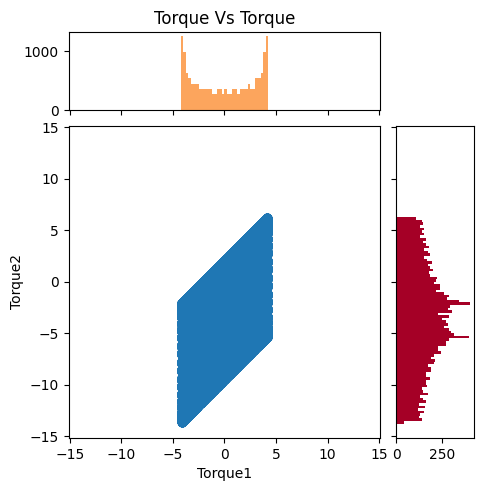

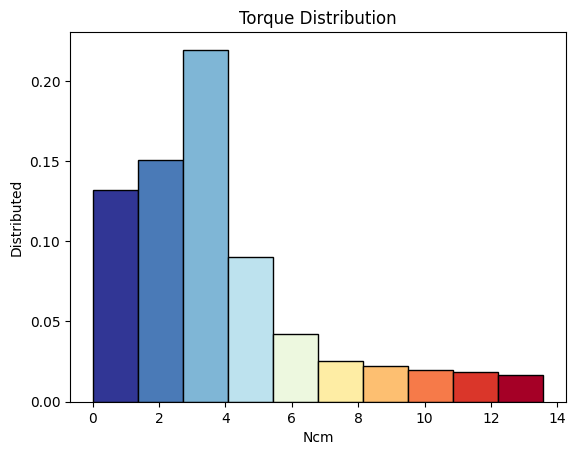

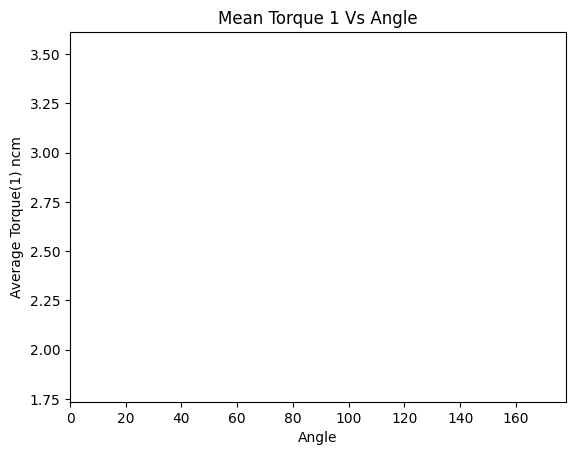

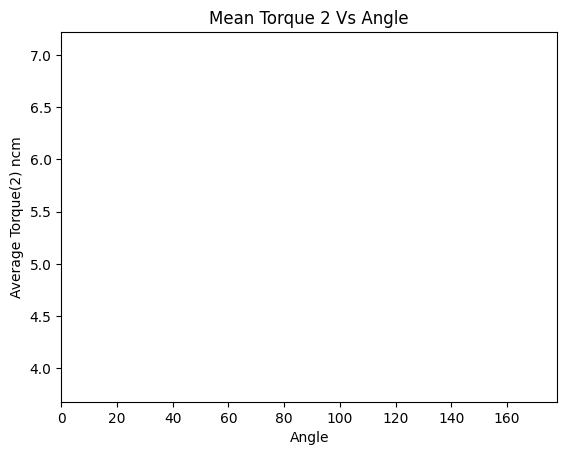

In [7]:
# ANIMATION Auto torque deriveration. 

# calculations derived from https://community.robotshop.com/tutorials/show/robot-leg-torque-tutorial
# matplotlib stuff derived from their wiki page.
# program copyright Dylan Holmes, 2023, all rights reserved

from math import cos
import matplotlib as mp
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np

theta_1_start = 0
theta_1_end = 180
theta_2_start = 0
theta_2_end = 90

# grams
m4 = 764 + 100
m3 = 40
m2 = 50
m1 = 50

# m
L1 = 0.010
L2 = 0.014
L3 = 0.021

W4 = 9.8 * m4/1000
W3 = 9.8 * m3/1000
W2 = 9.8 * m2/1000
W1 = 9.8 * m1/1000

print("----------------------------------------------------")
print("Weights (Newtons): ")
print("4: " + str(W4))
print("3: " + str(W3))
print("2: " + str(W2))
print("1: " + str(W1))
print("TotalWeight: " + str(W4 + 6*(W1+W2+W3)))

# N1 + 2*N2
CombinedThreeLegNormal = W4 + 6*(W1+W2+W3)


MaxT1 = 0
tt1 = []
th1 = []
MaxT2 = 0
tt2 = []
th2 = []

theta_1_count = 0
theta_2_count = 0
for theta_1 in range(theta_1_start, theta_1_end):
    theta_1_count +=1
    for theta_2 in range(theta_2_start, theta_2_end):
        if (theta_1_count ==1 ): theta_2_count +=1 
        
        # Torque Left Foot = 0
        # = sum of torques on the left foot
        
        Tlf1 = W1 * L1 * cos(theta_1)
        Tlf2 = W2 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf3 = W3 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf4 = W4 * (L1 * cos(theta_1) + L2 * cos(theta_2) + L3)
        
        Tlf5 = 2 * W3 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf6 = 2 * W2 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf7 = 2 * W1 * (L1 * cos(theta_1) + 2 * L2 * cos(theta_2) + 2 * L3)
        
        # This * 2 * N2 = Tlf8
        Tlf_p8 = 2*L1*cos(theta_1) + 2 *L2 * cos(theta_2) + 2 * L3
        
        # As, 
        # N1 + 2N2 = CombinedThreeLegNormal
        # And NetTorque = 0
        
        N2 = ((Tlf1 + Tlf2 + Tlf3 + Tlf4 + Tlf5 + Tlf6 + Tlf7)/Tlf_p8)/2
        N1 = CombinedThreeLegNormal - 2*N2
        
        #print("----------------------------------------------------")
        #print("Normal2 (Shared normal of two leg side): " + str(N2))
        #print("Normal1 (Normal of one leg side): " + str(N1))
        #print("----------------------------------------------------")
        
        # Torque on the knee = 0
        # = Sum of torques around the knee
        
        Tk1 = N1 * (L1 * cos(theta_1))
              # two in one here          |    ----------------
        Tk2 = W2 * ( L2 * cos(theta_2)) + W3 * (L2 * cos(theta_2))
              # two in one here               |    ----------------
        Tk3 = W4 * (L2 * cos(theta_2) + L3 ) + 2 * W3 * (L2 * cos(theta_2) + 2 * L3)
        Tk4 = 2 * W2 * (L2 * cos(theta_2) + 2 * L3)
        Tk5 = 2 * W1 * (2 * L2 * cos(theta_2) + 2 * L3)
        Tk6 = -2 * N2 * (2 * L2 * cos(theta_2) + 2 * L3 + L1 * cos(theta_1))
        
        T1 = Tk1 + Tk2 + Tk3 + Tk4 + Tk5 + Tk6
        
        #print("Torque 1 (Nm) : " + str(T1))
        #print("Torque 1 (Ncm) : " + str(T1 * 100))
        
        # Torque on Hip = 0
        # = sum of torques around the hip
        
        Th1 = N1 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Th2 = -W1 * (L2 * cos(theta_2))
        Th3 = W4 * L3
        Th4 = 2 * W2 * L3
        Th5 = 2 * W3 * L3
        Th6 = 2 * W1 * (2 * L3 + L2 * cos(theta_2))
        Th7 = -2 * N2 * (2 * L3 + L2 * cos(theta_2) + L1 * cos(theta_1))
        
        T2 = Th1 + Th2 + Th3 + Th4 + Th5 + Th6 + Th7
        
        tt1.append(T1*100)
        tt2.append(T2*100)
        th1.append(theta_1)
        th2.append(theta_2)
        
        if (abs(T2) > MaxT2):
            MaxT2 = abs(T2)
        if (abs(T1) > MaxT1):
            MaxT1 = abs(T1)
        #print("Torque 2 (Nm) : " + str(T2))
        #print("Torque 2 (Ncm) : " + str(T2 * 100))

print ("Torque 1 max: ")
print ("(N.m): " + str(MaxT1))
print ("(N.cm): " + str(MaxT1 * 100))
print ("(kgf.m): " + str(MaxT1 / 9.8))
print ("(kgf.cm): " + str(MaxT1 / 9.8  * 100 ))

print ("Torque 2 max: ")
print ("(N.m): " + str(MaxT2))
print ("(N.cm): " + str(MaxT2 * 100))
print ("(kgf.m): " + str(MaxT2 / 9.8))
print ("(kgf.cm): " + str(MaxT2 / 9.8  * 100 ))


#
# MATPLOTLIB
#

cm = mp.colormaps['RdYlBu_r']

#
# MAKE THE SCATTER HISTOGRAM
#
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    s = ax.scatter(x, y)
    plt.title("Torque Vs Torque")
    plt.xlabel("Torque1")
    plt.ylabel("Torque2")

    # Apply visual scaling
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    # Make the histograms
    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, color=cm.resampled(8)(0.7))
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=cm.resampled(8)(0.9))

# Initialise the above
fig = plt.figure(layout='constrained')
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)

scatter_hist(tt1, tt2, ax, ax_histx, ax_histy)
plt.show()

#
# MAKE THE DISTRIBUTION GRAPH
#

n, bins, patches = plt.hist(np.absolute(tt1 + tt2),color="red", ec="black", density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.title("Torque Distribution")
plt.xlabel("Ncm")
plt.ylabel("Distributed")
plt.show()

#
# MAKE THE ANGLE VS TORQUE GRAPH
#

torque_1_subs = np.mean(np.split(np.absolute(tt1), theta_2_count),axis=1)
torque_2_subs = np.mean(np.split(np.absolute(tt2), theta_2_count),axis=1)

angle_subs = [i[0] for i in np.split(np.array(th1), theta_2_count)]


    
figt1, axt1 = plt.subplots()
linet1 = plt.plot(angle_subs[0], torque_1_subs[0], color=cm.resampled(4)(0.5))[0]
axt1.set(xlim=[np.min(angle_subs),np.max(angle_subs)], ylim=[np.min(torque_1_subs),np.max(torque_1_subs)], xlabel="Angle", ylabel="Ncm")
plt.title("Mean Torque 1 Vs Angle")
plt.xlabel("Angle")
plt.ylabel("Average Torque(1) ncm")

def updatet1(frame):
    x = angle_subs[:frame]
    y = torque_1_subs[:frame]
    linet1.set_xdata(x)
    linet1.set_ydata(y)
    return linet1

anit1 = animation.FuncAnimation(fig=figt1, func=updatet1, frames=len(torque_1_subs), interval=30)
anit1.save(filename="T1VA.mp4", writer="ffmpeg")
#plt.show()

figt2, axt2 = plt.subplots()
linet2 = plt.plot(angle_subs[0], torque_2_subs[0], color=cm.resampled(2)(1))[0]
axt2.set(xlim=[np.min(angle_subs),np.max(angle_subs)], ylim=[np.min(torque_2_subs),np.max(torque_2_subs)], xlabel="Angle", ylabel="Ncm")
plt.title("Mean Torque 2 Vs Angle")
plt.xlabel("Angle")
plt.ylabel("Average Torque(2) ncm")

def updatet2(frame):
    x = angle_subs[:frame]
    y = torque_2_subs[:frame]
    linet2.set_xdata(x)
    linet2.set_ydata(y)
    return linet2

anit2 = animation.FuncAnimation(fig=figt2, func=updatet2, frames=len(torque_2_subs), interval=30)
anit2.save(filename="T2VA.mp4", writer="ffmpeg")
#plt.show()
